In [10]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV
from sklearn.ensemble import VotingRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'Dataset_final/'
x1_train = pd.read_csv(path+'data_x1_train.csv')
x2_train = pd.read_csv(path+'data_x2_train.csv')
y_train = pd.read_csv(path+'data_f1_train.csv')
y_test = pd.read_csv(path+'data_f1_test.csv')
x1_test = pd.read_csv(path+'data_x1_test.csv')
x2_test = pd.read_csv(path+'data_x2_test.csv')

fv1_train = pd.read_csv(path+'Filvel_x1_train.csv')
fv1_test = pd.read_csv(path+'Filvel_x1_test.csv')
fv2_train = pd.read_csv(path+'Filvel_x2_train.csv')
fv2_test = pd.read_csv(path+'Filvel_x2_test.csv')

v1_train = pd.read_csv(path+'vel_x1_train.csv')
v1_test = pd.read_csv(path+'vel_x1_test.csv')
v2_train = pd.read_csv(path+'vel_x2_train.csv')
v2_test = pd.read_csv(path+'vel_x2_test.csv')


In [3]:
X_train = pd.DataFrame(data = np.concatenate((x1_train,x2_train,fv1_train,fv2_train,v1_train,v2_train),axis=1),columns = ['p1','p2','fv1','fv2','v1','v2'])
X_test = pd.DataFrame(data = np.concatenate((x1_test,x2_test,fv1_test,fv2_test,v1_test,v2_test),axis=1),columns = ['p1','p2','fv1','fv2','v1','v2'])
#y_train, y_test = np.array(y_train),np.array(y_test)
X_train.head()

,p1,p2,fv1,fv2,v1,v2
0,-0.0000,-0.0000,0.000000,0.000000,0.0000,0.0000
1,-0.0159,-0.0000,-0.001160,0.000000,-0.0159,0.0000
2,-0.0159,0.0171,-0.002151,0.001248,0.0000,0.0171
3,-0.0159,0.0171,-0.001837,0.002313,0.0000,0.0000
4,-0.0000,0.0329,-0.000409,0.003128,0.0159,0.0158


In [5]:
from scipy import *
from scipy.linalg import norm, pinv
import math

from matplotlib import pyplot as plt
 
class RBF:
     
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [np.random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = np.random.random((self.numCenters, self.outdim))
         
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return norm(c-d)**3
     
    def _calcAct(self, X):
        # calculate activations of RBFs
        G = np.zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
     
    def train(self, X, Y):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        # choose random center vectors from training set
        rnd_idx = np.random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i,:] for i in rnd_idx]
         
        #print("center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
        #print(G)
         
        # calculate output weights (pseudoinverse)
        self.W = np.dot(pinv(G), Y)
         
    def test(self, X):
        """ X: matrix of dimensions n x indim """
         
        G = self._calcAct(X)
        Y = np.dot(G, self.W)
        return Y



Time taken by RBF Model:  0:01:54.391059
Root mean square error of RBF Model:  0.07484086318366652
Minimum Error = [4.70742758e-08]
Maximum Error = [0.86743054]
Median Value of Error = [0.03458106]


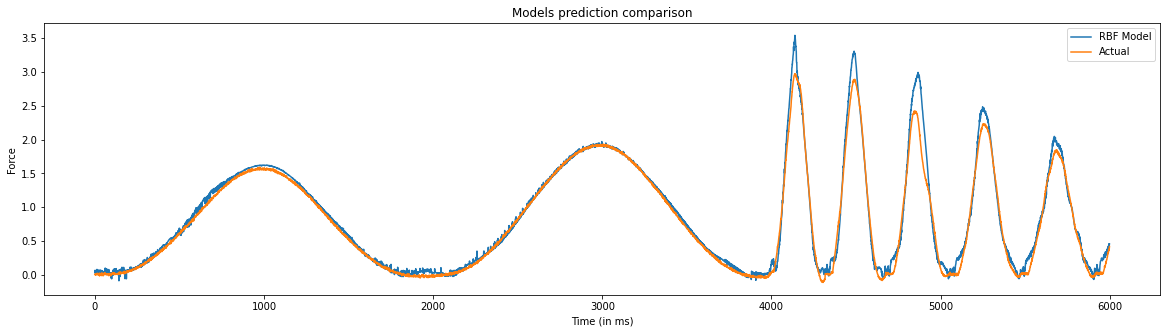

In [6]:
x_train,x_test = np.array(X_train),np.array(X_test)
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# RBF MODEL with k = 100
rbf = RBF(6, 100, 1)
t1 = datetime.now()
rbf.train(x_train, y_train)
t2 = datetime.now()
    
print('\n\nTime taken by RBF Model: ',t2-t1)
y1_pred = rbf.test(x_test)
y2 = y1_pred
print('Root mean square error of RBF Model: ',sqrt(mean_squared_error(y_test,y1_pred)))
    
error5 = []
for i in range(len(y_test)):
    error5.append(abs(y1_pred[i]-y_test.iloc[i,0]))
print('Minimum Error =',min(error5))
print('Maximum Error =',max(error5))
error6 = sorted(error5)
print('Median Value of Error =',error6[len(error5)//2])
    
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y2[:6000], label = 'RBF Model')
plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.show()
    

# Using Fractional Derivatives

In [11]:
path = 'Derivatives/'
x1_train = pd.read_csv(path+'data_derivative_training.csv')
x2_train = pd.read_csv(path+'data_derivative_training_x2.csv')

y_train = pd.read_csv(path+'data_force_output.csv')
y_test = pd.read_csv(path+'data_force_output_test.csv')

x1_test = pd.read_csv(path+'data_derivative_testing.csv')
x2_test = pd.read_csv(path+'data_derivative_testing_x2.csv')

X_train = pd.DataFrame(data = np.concatenate((x1_train,x2_train),axis=1))
X_test = pd.DataFrame(data = np.concatenate((x1_test,x2_test),axis=1))

x_train,x_test = np.array(X_train),np.array(X_test)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00
1,-0.025200,-0.039939,-0.063299,-0.100320,-0.159000,-0.252000,-0.399390,-0.632990,-1.003200,-1.59,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00
2,-0.022680,-0.031951,-0.044309,-0.060193,-0.079500,-0.100800,-0.119820,-0.126600,-0.100320,0.00,0.027102,0.042953,0.068076,0.107890,0.17100,0.27102,0.42953,0.68076,1.07890,1.71
3,-0.021546,-0.028756,-0.037663,-0.048155,-0.059625,-0.070559,-0.077881,-0.075959,-0.055177,0.00,0.024392,0.034363,0.047653,0.064736,0.08550,0.10841,0.12886,0.13615,0.10789,0.00
4,0.004372,0.013100,0.029402,0.058588,0.109310,0.195550,0.339680,0.577290,0.964600,1.59,0.048213,0.070614,0.103410,0.151480,0.22212,0.32630,0.48064,0.71070,1.05630,1.58


In [12]:
# MinMax scaling --> all points scaled between 0 and 1
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train[:5]

array([[0.09599827, 0.16956301, 0.23482136, 0.2933112 , 0.34436388,
        0.39420868, 0.42835605, 0.45611941, 0.47462714, 0.48675893,
        0.12157052, 0.19110249, 0.25598108, 0.31402101, 0.36983945,
        0.41019961, 0.44301931, 0.46383104, 0.48430361, 0.49894958],
       [0.09516105, 0.16832803, 0.23300125, 0.29062497, 0.34037482,
        0.38836168, 0.41987536, 0.44373601, 0.4563805 , 0.45959337,
        0.12157052, 0.19110249, 0.25598108, 0.31402101, 0.36983945,
        0.41019961, 0.44301931, 0.46383104, 0.48430361, 0.49894958],
       [0.09524477, 0.16857503, 0.23354729, 0.29169943, 0.34236935,
        0.39186988, 0.42581178, 0.4536427 , 0.47280247, 0.48675893,
        0.12245403, 0.19241599, 0.25793486, 0.31693515, 0.37410251,
        0.41638926, 0.45206567, 0.4772055 , 0.50418018, 0.52888655],
       [0.09528245, 0.16867382, 0.23373839, 0.29202177, 0.34286798,
        0.39257154, 0.42670232, 0.4546334 , 0.47362355, 0.48675893,
        0.12236569, 0.19215331, 0.25734872, 0

Time taken by Random Forest 0:04:55.196669
Root Mean Squared error of Random Forest 0.07115076904633995
Minimum Error = 0.0
Maximum Error = 1.3543779999999992
Median Value of Error = 0.018598000000000114


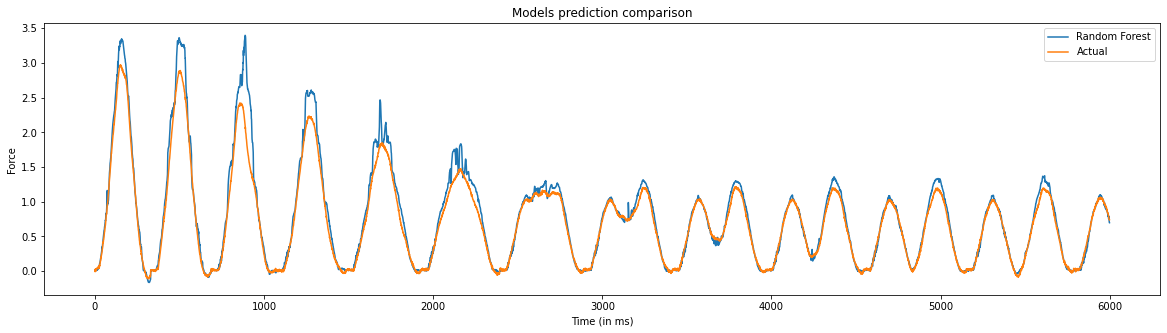

In [13]:
# Random Forest
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()
print('Time taken by Random Forest',t2-t1)
    
y1_pred = rf.predict(x_test)
y1 = y1_pred
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))
    
error = []
for i in range(len(y_test)):
    error.append(abs(y1_pred[i]-y_test.iloc[i,0]))
print('Minimum Error =',min(error))
print('Maximum Error =',max(error))
error1 = sorted(error)
print('Median Value of Error =',error1[len(error)//2])
    
# COMPARISON
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1[:6000], label = 'Random Forest')
plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.show()


Time taken by Gradient Boosting: 0:01:39.064576
Root mean square error of Gradient Boosting Model:  0.09140498302498339
Minimum Error = 3.7515596199369505e-06
Maximum Error = 1.413202533504088
Median Value of Error = 0.026322238802654274


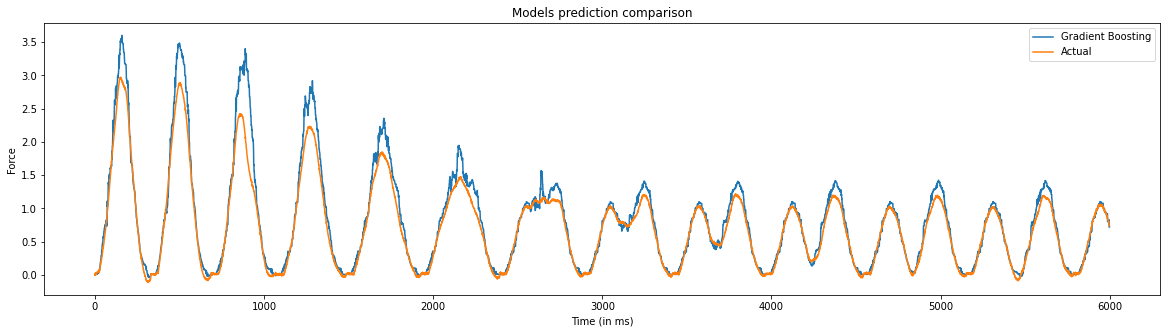

In [15]:
# GRADIENT BOOSTING
gb = GradientBoostingRegressor()
t1 = datetime.now()
gb.fit(x_train,y_train)
t2 = datetime.now()
print('Time taken by Gradient Boosting:',t2-t1)

y1_pred = gb.predict(x_test)
print('Root mean square error of Gradient Boosting Model: ',sqrt(mean_squared_error(y_test,y1_pred)))
y3 = y1_pred
    
error9 = []
for i in range(len(y_test)):
    error9.append(abs(y1_pred[i]-y_test.iloc[i,0]))
print('Minimum Error =',min(error9))
print('Maximum Error =',max(error9))
error8 = sorted(error9)
print('Median Value of Error =',error8[len(error9)//2])
    
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y3[:6000], label = 'Gradient Boosting')
plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.show()
    

# CatBoost Results

In [16]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x_train,y_train)
t2 = datetime.now()

Learning rate set to 0.086822
0:	learn: 0.9248567	total: 60.9ms	remaining: 1m
1:	learn: 0.8493298	total: 68.8ms	remaining: 34.3s
2:	learn: 0.7814290	total: 75.7ms	remaining: 25.2s
3:	learn: 0.7194026	total: 83ms	remaining: 20.7s
4:	learn: 0.6639401	total: 89.5ms	remaining: 17.8s
5:	learn: 0.6117036	total: 96.6ms	remaining: 16s
6:	learn: 0.5630509	total: 103ms	remaining: 14.7s
7:	learn: 0.5190099	total: 110ms	remaining: 13.6s
8:	learn: 0.4785451	total: 116ms	remaining: 12.8s
9:	learn: 0.4420374	total: 123ms	remaining: 12.1s
10:	learn: 0.4080988	total: 129ms	remaining: 11.6s
11:	learn: 0.3769202	total: 135ms	remaining: 11.1s
12:	learn: 0.3491072	total: 150ms	remaining: 11.4s
13:	learn: 0.3231697	total: 160ms	remaining: 11.3s
14:	learn: 0.2998369	total: 170ms	remaining: 11.1s
15:	learn: 0.2788479	total: 176ms	remaining: 10.8s
16:	learn: 0.2597674	total: 188ms	remaining: 10.9s
17:	learn: 0.2420596	total: 194ms	remaining: 10.6s
18:	learn: 0.2259909	total: 200ms	remaining: 10.3s
19:	learn: 0

In [17]:
print('Time taken by Cat Boosting:',t2-t1)

y_pred = cat.predict(x_test)
print('Root mean square error of Cat Boost Model: ',sqrt(mean_squared_error(y_test,y_pred)))

Time taken by Cat Boosting: 0:00:07.275057
Root mean square error of Cat Boost Model:  0.06606580428693186


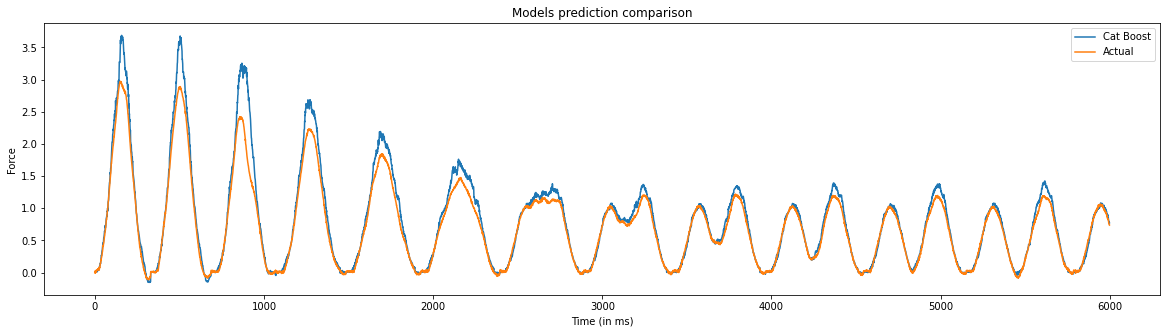

In [18]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y_pred[:6000], label = 'Cat Boost')
plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.show()

In [19]:
error_cat = []
for i in range(len(y_test)):
    error_cat.append(abs(y_pred[i]-y_test.iloc[i,0]))
print('Minimum Error =',min(error_cat))
print('Maximum Error =',max(error_cat))
error8 = sorted(error_cat)
print('Median Value of Error =',error8[len(error8)//2])

Minimum Error = 5.322102434313081e-07
Maximum Error = 1.2823272811832451
Median Value of Error = 0.017075754551200015


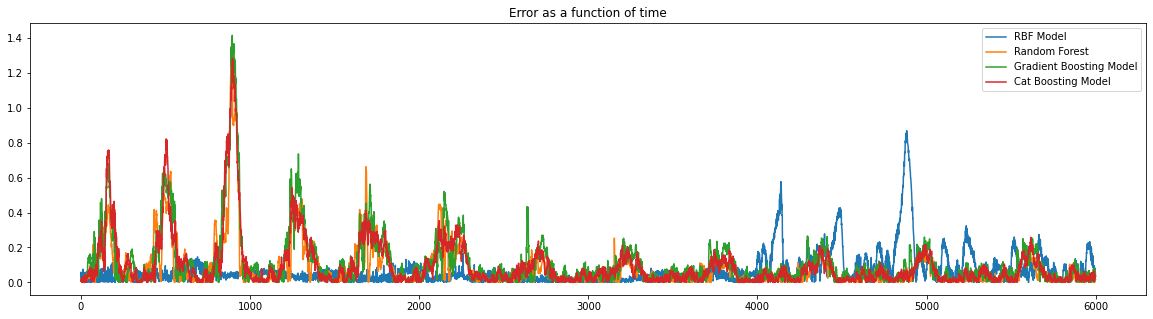

In [20]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),error5[:6000], label = 'RBF Model')
plt.plot(list(range(6000)),error[:6000], label = 'Random Forest')
plt.plot(list(range(6000)),error9[:6000], label = 'Gradient Boosting Model')
plt.plot(list(range(6000)),error_cat[:6000], label = 'Cat Boosting Model')
plt.legend()
plt.title('Error as a function of time')
plt.show()